<a href="https://colab.research.google.com/github/yukomath/Project_1/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 : Business Understanding

## Brief Description
This project uses data from the **Stack Overflow Developer Survey 2025** to analyze and predict software developers’ salaries based on their country,  education level, experience, and technical skills. The goal is to provide insights that help **job seekers understand their market value** and **make informed career decisions**.

---

## Business Objective
- To identify the key factors that influence developer salaries globally.  
- To build predictive models that estimate expected salaries based on individual profiles.  
- To help job seekers and employers make data-driven decisions about compensation and skill development.

---

## Current Situation
- The global tech job market is highly competitive, and compensation varies widely depending on country, education level, experience, and skill set.  
- Stack Overflow’s annual developer survey provides a rich dataset capturing these variations.  
- By analyzing this data, we can identify **which skills, experiences, education level or locations command higher salaries.**

---

## Analytic Goals
1. Explore relationships between experience, education level, technical skills, and salary.  
2. Build regression models (Linear Regression, Random Forest, LightGBM) to predict developer salaries.  
3. Use SHAP analysis to interpret model outputs and identify the most influential factors.  
4. Allow users to input their own profiles and compare expected salaries across countries.

---

## Success Criteria
- Model performance: R² > 0.60, MAE < $20,000 USD.  
- SHAP results clearly identify the most influential salary factors.  
- Insights are interpretable and actionable for non-technical users (e.g., job seekers, recruiters).


---

## Key Questions

### Question 1
**What salary can job seekers expect based on their experience and skills?**  
→ Helps job seekers understand their market value and career progression potential.

### Question 2
**How do different programming languages or technologies impact salary expectations?**  
→ Guides job seekers on which skills are most valuable to develop.

### Question 3
**What is the average salary for job seekers in different countries or regions?**  
→ Supports relocation or remote work decisions based on geographic pay differences.

### Question 4
**How does education level affect salary potential for job seekers?**  
→ Helps evaluate the value of further education or certifications.




# Section 2: Data Understanding

## 2.1 Data Source

The dataset used in this project is [the Stack Overflow Developer Survey 2025](https://survey.stackoverflow.co/), which collects responses from software developers worldwide. This dataset provides a comprehensive view of global developer demographics, skills, and compensation.

## 2.2 Data Loading and Initial Exploration



### Preparation for Google Colab (Only Once)

Mounts Google Drive at /content/drive for file access in Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The data was loaded from Google Drive in CSV format:


In [2]:
# import library
import pandas as pd
import numpy as np

# loading csv file from my google drive
path = '/content/drive/MyDrive/ColabProjects/StackOverflow2025/survey_results_public_2025.csv'
df = pd.read_csv(path, encoding='utf-8-sig')

# Check Data
print("Data loaded successfully")
print("Rows, Columns:", df.shape)



Data loaded successfully
Rows, Columns: (49123, 170)


## 2.3 Selected Variables for Analysis

We only focus on the following variables because they reflect the key factors that influence developer compensation:

- Country

- Education level (EdLevel)

- Years of coding experience (YearsCode)

- Employment type

- Programming languages used

- AI tools usage

- Target variable: Annual salary (ConvertedCompYearly)

These variables capture developers’ background, experience, and technical skills — all of which are essential for understanding global salary patterns and building accurate prediction models.

In [3]:
# Select relevant columns in the data

cols = [
    "Country",
    "EdLevel",
    "WorkExp",                # professional work experience years
    "YearsCode",              # coding experience years
    "LanguageHaveWorkedWith", # languages used
    "AISelect",               # AI tools usage indicator
    "ConvertedCompYearly"     # salary (target)
]
df = df[cols].copy()

## 2.4 Data Structure and Variable Types

After selecting the relevant columns, the dataset contains a mix of numerical, categorical, and multi-label variables. Understanding the structure of each variable is essential for choosing appropriate preprocessing and modeling techniques.

### Variable Types Overview

| Variable | Description | Type | Notes |
|---------|-------------|------|-------|
| **Country** | Respondent’s country of residence | Categorical | High-cardinality categorical variable |
| **EdLevel** | Highest level of education achieved | Categorical | Contains multiple education formats and wording variations |
| **WorkExp** | Years of professional coding experience | Numerical (sometimes string) | Requires cleaning because some values are ranges or text (e.g., "Less than 1 year") |
| **YearsCode** | Years of coding experience (including non-professional) | Numerical (sometimes string) | Similar cleaning needed as WorkExp |
| **LanguageHaveWorkedWith** | Programming languages the respondent has worked with | Multi-label categorical | Contains languages in a semicolon-separated format |
| **AISelect** | Whether respondents use AI tools | Categorical / Binary | May contain multiple selections |
| **ConvertedCompYearly** | Annual salary in USD | Numerical | Target variable; contains outliers and missing values |

### Key Points

- Categorical variables require encoding before modeling.  
- Numeric variables require cleaning and conversion.  
- Multi-label variables (like programming languages) will be expanded using multi-hot encoding.  
- The target variable may contain extreme outliers that need attention during preprocessing.


In [4]:
# Preview a few rows
df.head()

,Country,EdLevel,WorkExp,YearsCode,LanguageHaveWorkedWith,AISelect,ConvertedCompYearly
0,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8.0,14.0,Bash/Shell (all shells);Dart;SQL,"Yes, I use AI tools monthly or infrequently",61256.0
1,Netherlands,"Associate degree (A.A., A.S., etc.)",2.0,10.0,Java,"Yes, I use AI tools weekly",104413.0
2,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,12.0,Dart;HTML/CSS;JavaScript;TypeScript,"Yes, I use AI tools daily",53061.0
3,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.0,5.0,Java;Kotlin;SQL,"Yes, I use AI tools weekly",36197.0
4,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",21.0,22.0,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,"Yes, I use AI tools weekly",60000.0


In [15]:
# Check data types of all selected columns
print("=== Data Types ===")
display(df.dtypes.to_frame(name="DataType"))

print("\n=== DataFrame Info ===")
df.info()


=== Data Types ===


,DataType
Country,object
EdLevel,object
WorkExp,float64
YearsCode,float64
LanguageHaveWorkedWith,object
AISelect,object
ConvertedCompYearly,float64



=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 35402 non-null  object 
 1   EdLevel                 48087 non-null  object 
 2   WorkExp                 42844 non-null  float64
 3   YearsCode               43000 non-null  float64
 4   LanguageHaveWorkedWith  31643 non-null  object 
 5   AISelect                33686 non-null  object 
 6   ConvertedCompYearly     23928 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.6+ MB


### Summary

The dataset contains three types of variables:

| Type                        | Variables                               | Notes                                                       |
| --------------------------- | --------------------------------------- | ----------------------------------------------------------- |
| **Numerical**               | WorkExp, YearsCode, ConvertedCompYearly | Include strings like “Less than 1 year”, require conversion |
| **Categorical**             | Country, EdLevel, AISelect              | Need encoding later                                         |
| **Multi-label categorical** | LanguageHaveWorkedWith                  | Semicolon-separated values → multi-hot encoding needed      |


## 2.5 Data Quality Issues

This section identifies data quality problems that must be addressed before modeling.

### 1. Missing Values

Common missing fields:

EdLevel (education level), WorkExp, LanguageHaveWorkedWith,AISelect, ConvertedCompYearly (salary)

→ Missing values will be handled in Section 3 (Data Preparation) using:

-- Filling categorical N/A with “Unknown”

-- Filling YearsCode with median

-- Dropping rows with missing salary


### 2. Inconsistent Formats

Some numeric fields are not numeric:

“Less than 1 year”

“More than 50 years”

“3-5 years”

→ These require conversion to numeric during preprocessing.


### 3. Multi-label Values

LanguageHaveWorkedWith contains values like:

Python;JavaScript;SQL


→ Must be expanded into multi-hot encoded columns.

### 4. Outliers

Salary contains extreme values (e.g., $0, $1, $1,000,000+).

→ We will filter data to a reasonable range (e.g., 5,000–500,000 USD).

## 2.6 Initial Finding

Here we perform basic exploratory analysis before data cleaning.

### 1. Number of Countries
The dataset includes developers from 177 unique countries, reflecting a wide geographic coverage.

In [16]:
print("Number of unique countries:", df["Country"].nunique())


Number of unique countries: 177


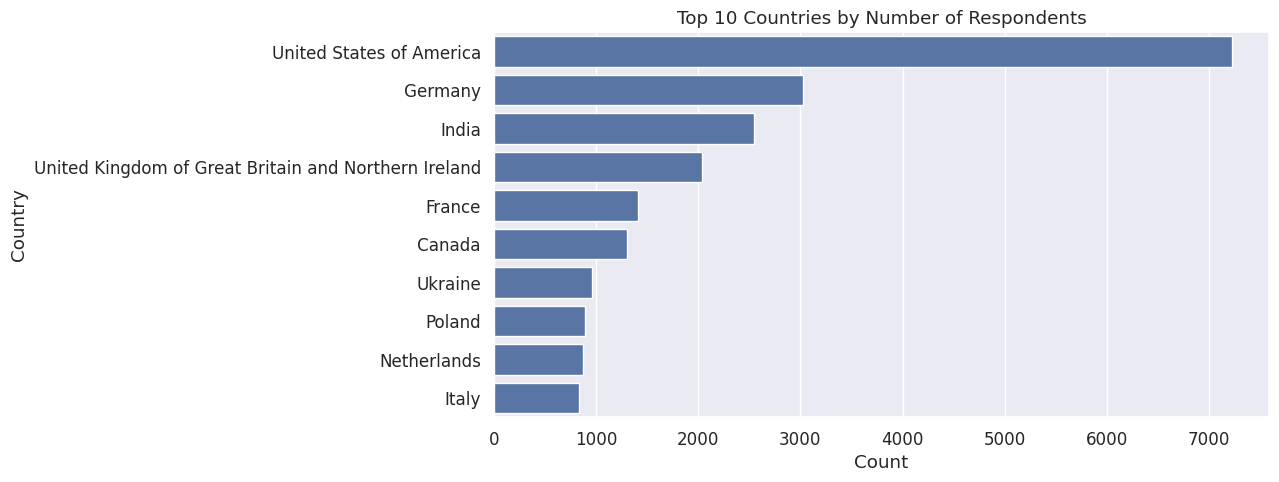

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set(font_scale=1.1)

# --------------------------------------
# Top 10 Countries
# --------------------------------------
country_counts = df["Country"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title("Top 10 Countries by Number of Respondents")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

### 2. Most Frequent Programming Languages

The most commonly used programming languages are dominated by Python, JavaScript, and SQL, indicating their widespread adoption among developers.

In [5]:
# Split multi-label languages
language_series = (
    df["LanguageHaveWorkedWith"]
    .dropna()
    .str.split(";", expand=True)
    .stack()
)

top_languages = language_series.value_counts().head(10)

print("Top 10 most used programming languages:")
display(top_languages)


Top 10 most used programming languages:


,count
JavaScript,20986
HTML/CSS,19681
SQL,18617
Python,18388
Bash/Shell (all shells),15486
TypeScript,13852
Java,9344
C#,8845
C++,7479
PowerShell,7366


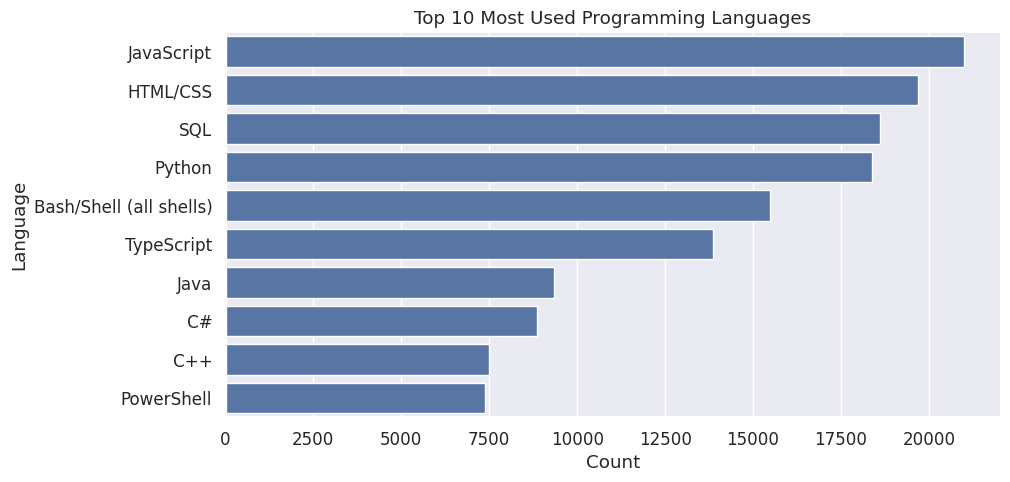

In [9]:
# --------------------------------------
# 2. Top 10 Programming Languages
# --------------------------------------
language_series = (
    df["LanguageHaveWorkedWith"]
    .dropna()
    .str.split(";", expand=True)
    .stack()
)

top_languages = language_series.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_languages.values, y=top_languages.index)
plt.title("Top 10 Most Used Programming Languages")
plt.xlabel("Count")
plt.ylabel("Language")
plt.show()

### 3. Salary Basic Statistics

- The annual salary (ConvertedCompYearly) varies widely, ranging from very low to extremely high values (outliers above $1,000,000).

- Most developers earn between $20,000 and $150,000 USD per year, with the distribution skewed to the right due to a small number of very high salaries.

- This long-tailed distribution suggests that while typical salaries are moderate, a few developers earn exceptionally high compensation.

- Visual inspection of the histogram (with outliers removed or log-transformed) shows a clear peak around the median salary and a gradual decline toward higher salaries.

In [10]:
print("Salary Statistics:")
display(df["ConvertedCompYearly"].describe())


Salary Statistics:


,ConvertedCompYearly
count,2.392800e+04
mean,1.017916e+05
std,4.619345e+05
min,1.000000e+00
25%,3.817100e+04
50%,7.538350e+04
75%,1.206302e+05
max,5.000000e+07


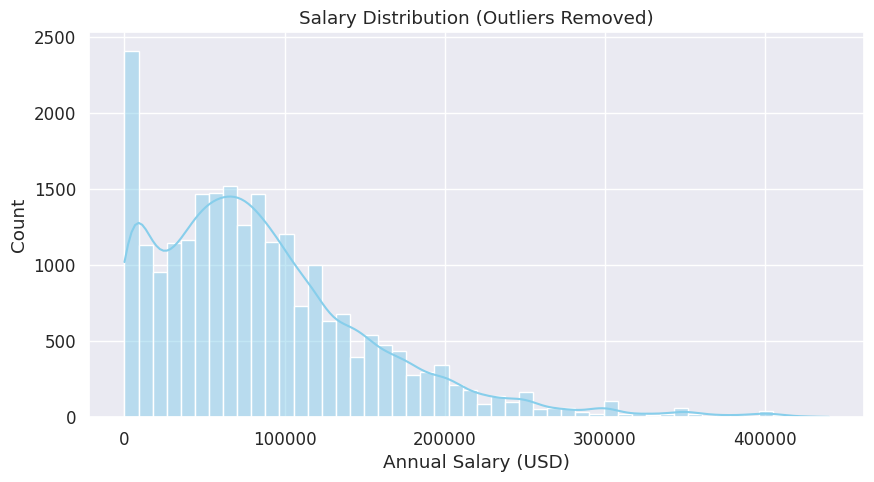

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare data: salary column
salary = df["ConvertedCompYearly"]

# Remove outliers (top 1%)
salary_clean = salary[salary < salary.quantile(0.99)]

# Set plot style
plt.style.use('default')
sns.set(font_scale=1.1)

# --------------------------------------
# Histogram (normal scale)
# --------------------------------------
plt.figure(figsize=(10,5))
sns.histplot(salary_clean, bins=50, kde=True, color='skyblue')
plt.title("Salary Distribution (Outliers Removed)")
plt.xlabel("Annual Salary (USD)")
plt.ylabel("Count")
plt.show()



### 4. Experience Distribution

YearsCode (total coding experience) also exhibits a wide range, with many developers clustered around 3–10 years of experience.

A smaller number of developers have very high experience (20+ years), which can influence salary predictions.

In [12]:
print("YearsCode (Raw) Statistics:")
display(df["YearsCode"].describe())


YearsCode (Raw) Statistics:


,YearsCode
count,43000.000000
mean,16.575256
std,11.789269
min,1.000000
25%,8.000000
50%,14.000000
75%,24.000000
max,100.000000


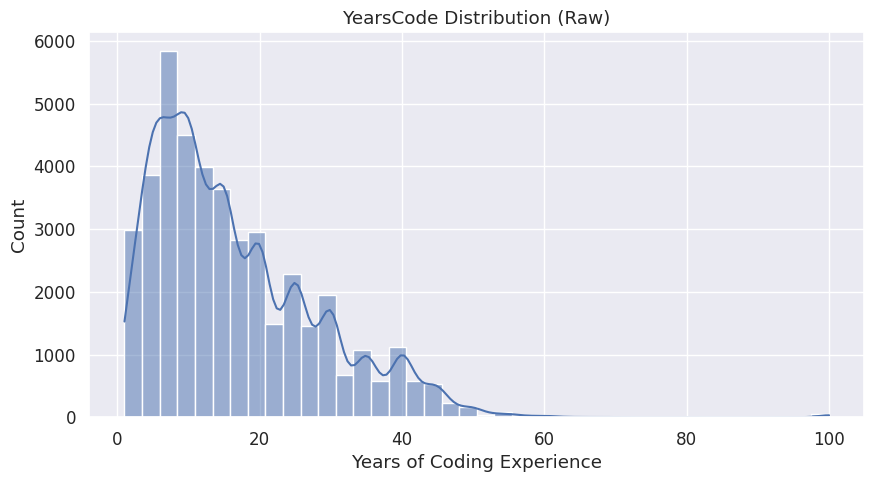

In [13]:
# --------------------------------------
# YearsCode Distribution
# --------------------------------------
plt.figure(figsize=(10,5))
sns.histplot(df["YearsCode"], bins=40, kde=True)
plt.title("YearsCode Distribution (Raw)")
plt.xlabel("Years of Coding Experience")
plt.show()


# Section 3: Data Preparation

# Section 3: Data Preparation

In this section, we clean and preprocess the dataset to make it ready for modeling.  
The main steps are:

1. **Handling Missing Values**  
   - Fill missing categorical values (`Country`, `EdLevel`, `AISelect`) with `"Unknown"`.  
   - Fill missing numerical values (`YearsCode`, `WorkExp`) with the median.  
   - Drop rows with missing target variable (`ConvertedCompYearly`).  

2. **Multi-label Encoding**  
   - Convert `LanguageHaveWorkedWith` (semicolon-separated programming languages) into multi-hot encoded binary columns.  

3. **One-hot Encoding for Categorical Columns**  
   - Convert remaining categorical columns to numeric using one-hot encoding.  

4. **Outlier Handling**  
   - Filter `ConvertedCompYearly` to a reasonable range (e.g., $5,000–$500,000).  

5. **Replace Special Characters in Column Names**  
   - LightGBM does not support special characters in column names, so replace them with underscores.


In [14]:
# --------------------------------------
# Step 1: Handling Missing Values
# --------------------------------------
categorical_cols = ["Country", "EdLevel", "AISelect"]
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")

# Fill missing numerical values
median_yearscode = pd.to_numeric(df["YearsCode"], errors='coerce').median()
df["YearsCode"] = pd.to_numeric(df["YearsCode"], errors='coerce').fillna(median_yearscode)

# Convert WorkExp to numeric and fill remaining NaN
def convert_experience(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        value = value.strip().lower()
        if value == "less than 1 year":
            return 0.5
        elif value == "more than 50 years":
            return 50
        elif "-" in value:
            parts = value.split("-")
            try:
                return (float(parts[0]) + float(parts[1])) / 2
            except:
                return np.nan
        else:
            try:
                return float(value)
            except:
                return np.nan
    return value

df["WorkExp"] = df["WorkExp"].apply(convert_experience)
df["WorkExp"] = df["WorkExp"].fillna(df["WorkExp"].median())

# Drop rows with missing target
df = df.dropna(subset=["ConvertedCompYearly"])

# --------------------------------------
# Step 2: Multi-label Encoding for Programming Languages
# --------------------------------------
languages_series = df["LanguageHaveWorkedWith"].dropna().str.split(";", expand=True).stack()
unique_languages = languages_series.unique()
multi_hot_df = pd.DataFrame(0, index=df.index, columns=unique_languages)

for i, langs in df["LanguageHaveWorkedWith"].dropna().items():
    for lang in langs.split(";"):
        multi_hot_df.at[i, lang] = 1

df = pd.concat([df, multi_hot_df], axis=1)
df.drop("LanguageHaveWorkedWith", axis=1, inplace=True)

# --------------------------------------
# Step 3: One-hot Encoding for Categorical Columns
# --------------------------------------
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --------------------------------------
# Step 4: Outlier Handling
# --------------------------------------
min_salary = 5000
max_salary = 500000
df = df[(df["ConvertedCompYearly"] >= min_salary) &
        (df["ConvertedCompYearly"] <= max_salary)]

# --------------------------------------
# Step 5: Replace Special Characters in Column Names
# --------------------------------------
df.columns = df.columns.str.replace(r"[^A-Za-z0-9_]", "_", regex=True)

# --------------------------------------
# Check the first few rows and datatypes
# --------------------------------------
print("Sample data after full preprocessing:")
display(df.head())
print("Data types after preprocessing:")
display(df.dtypes)


Sample data after full preprocessing:


,WorkExp,YearsCode,ConvertedCompYearly,Bash_Shell__all_shells_,Dart,SQL,Java,HTML_CSS,JavaScript,TypeScript,...,EdLevel_Primary_elementary_school,EdLevel_Professional_degree__JD__MD__Ph_D__Ed_D__etc__,EdLevel_Secondary_school__e_g__American_high_school__German_Realschule_or_Gymnasium__etc__,EdLevel_Some_college_university_study_without_earning_a_degree,EdLevel_Unknown,AISelect_No__but_I_plan_to_soon,AISelect_Unknown,AISelect_Yes__I_use_AI_tools_daily,AISelect_Yes__I_use_AI_tools_monthly_or_infrequently,AISelect_Yes__I_use_AI_tools_weekly
0,8.0,14.0,61256.0,1,1,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,2.0,10.0,104413.0,0,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,10.0,12.0,53061.0,0,1,0,0,1,1,1,...,False,False,False,False,False,False,False,True,False,False
3,4.0,5.0,36197.0,0,0,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,21.0,22.0,60000.0,0,0,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True


Data types after preprocessing:


,0
WorkExp,float64
YearsCode,float64
ConvertedCompYearly,float64
Bash_Shell__all_shells_,int64
Dart,int64
...,...
AISelect_No__but_I_plan_to_soon,bool
AISelect_Unknown,bool
AISelect_Yes__I_use_AI_tools_daily,bool
AISelect_Yes__I_use_AI_tools_monthly_or_infrequently,bool


In [15]:
# Check data types of all columns
print("=== Data Types ===")
display(df.dtypes.to_frame(name="DataType"))


=== Data Types ===


,DataType
WorkExp,float64
YearsCode,float64
ConvertedCompYearly,float64
Bash_Shell__all_shells_,int64
Dart,int64
...,...
AISelect_No__but_I_plan_to_soon,bool
AISelect_Unknown,bool
AISelect_Yes__I_use_AI_tools_daily,bool
AISelect_Yes__I_use_AI_tools_monthly_or_infrequently,bool


# Section 4: Data Modeling

## 1. Train/Test Split

We split the dataset into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

- Features (X): Predictor variables -
"Country", "EdLevel", "WorkExp", "YearsCode", "LanguageHaveWorkedWith", "AISelect","ConvertedCompYearly"- influencing salary.

- Target (y): ConvertedCompYearly (annual salary).

- Random state: Ensures reproducible splits.

This prepares the data for modeling with Linear Regression, Random Forest, or LightGBM.

In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import numpy as np

# --------------------------------------
# 1. Train/Test Split
# --------------------------------------

# Define features (X) and target (y)
X = df.drop("ConvertedCompYearly", axis=1)
y = df["ConvertedCompYearly"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##2. Preprocessing for Linear Regression

## 3. Model Training: Linear Regression, Random Forest, LightGBM

In [17]:
# Install dependencies (only once)
!pip install lightgbm shap -q
!pip install lightgbm -q



In [18]:
# ---- Linear Regression ----
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



LinearRegression()

In [19]:
# ---- LightGBM ----

lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 17636, number of used features: 120
[LightGBM] [Info] Start training from score 95267.523985


LGBMRegressor(learning_rate=0.05, n_estimators=1000, random_state=42)

In [20]:
# ---- Random Forest ----
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# --------------------------------------
# 3. Model Training
# --------------------------------------

# ---- Linear Regression ----
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# ---- Random Forest ----
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ---- LightGBM ----
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
lgb_model.fit(X_train, y_train)

## 2. Feature Scaling (for Linear Regression)

## 3. Model Training: Linear Regression, Random Forest, LightGBM

## 4. Model Evaluation (R², MAE, RMSE)

## 5. Feature Importance / SHAP

In [ ]:
## 2.Feature Scaling (for Linear Regression)

## 3. Model Training: Linear Regression, Random Forest, LightGBM

## 4. Model Evaluation (R², MAE, RMSE)

## 5. Feature Importance / SHAP

In [ ]:
# --------------------------------------
# Section 4: Modeling
# --------------------------------------

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import numpy as np

# --------------------------------------
# 1. Train/Test Split
# --------------------------------------

# Define features (X) and target (y)
X = df.drop("ConvertedCompYearly", axis=1)
y = df["ConvertedCompYearly"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------
# 2. Feature Scaling (only for Linear Regression)
# --------------------------------------

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
# We scale only numeric columns
numeric_cols = ["WorkExp", "YearsCode"]  # adjust as needed
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# --------------------------------------
# 3. Model Training
# --------------------------------------

# ---- Linear Regression ----
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# ---- Random Forest ----
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ---- LightGBM ----
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
lgb_model.fit(X_train, y_train)

# --------------------------------------
# 4. Model Evaluation
# --------------------------------------

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} Performance:")
    print(f"R²: {r2:.3f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}\n")

# Evaluate Linear Regression
evaluate_model(lr_model, X_test_scaled, y_test, "Linear Regression")

# Evaluate Random Forest
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# Evaluate LightGBM
evaluate_model(lgb_model, X_test, y_test, "LightGBM")

# --------------------------------------
# 5. Feature Importance using SHAP (for Random Forest)
# --------------------------------------

# Initialize SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


2. Build a Salary Prediction Model with Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Save metrics for later comparison
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))


# Model Evaluation
print(f"Linear Regression R²: {r2_lr:.3f}")
print(f"MAE: {mae_lr:,.0f} USD")
print(f"RMSE: {rmse_lr:,.0f} USD")

# Regression coefficients (feature importance)
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\n--- Top Positive Coefficients ---")
display(coef_df.head(10))

print("\n--- Top Negative Coefficients ---")
display(coef_df.tail(10))


3. Build a Salary Prediction Model with Random Forest


In [ ]:
# Only once
!pip install shap


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap


In [ ]:
# Create Random Forest model (tuned version)
rf = RandomForestRegressor(
    n_estimators=500,        # Number of trees
    max_depth=20,            # Maximum depth of each tree
    min_samples_split=5,     # Minimum samples required to split an internal node
    min_samples_leaf=4,      # Minimum samples required at each leaf node
    random_state=42,
    n_jobs=-1                # Use all CPU cores for faster computation
)

# Train the model
rf.fit(X_train, y_train)

print("Random Forest model trained successfully!")


In [ ]:
# Predict on the test data
y_pred_rf = rf.predict(X_test)

# Model Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest R²: {r2_rf:.3f}")
print(f"MAE: {mae_rf:,.0f} USD")
print(f"RMSE: {rmse_rf:,.0f} USD")


In [ ]:
# SHAP analysis
explainer_rf = shap.TreeExplainer(rf)

# Sample data to speed up SHAP computation
#shap_values_rf = explainer_rf.shap_values(X_test)

# Display summary plot
#shap.summary_plot(shap_values_rf, X_test)

#version 2
#Calculate SHAP values for the test data (reduce sample size to speed up computation)
#shap_values_rf = explainer_rf.shap_values(X_test.sample(1000, random_state=42))
#shap.summary_plot(shap_values_rf, X_test.sample(1000, random_state=42))

#version 3 Display summary plot for top 10 important features
X_sample = X_test.sample(500, random_state=42)
shap_values_rf = explainer_rf.shap_values(X_sample)
shap.summary_plot(shap_values_rf, X_sample, max_display=10)

How to Read a SHAP Plot

X-axis (SHAP value):
Represents how each feature influences the predicted salary.

Positive values → push the prediction up (increase salary)

Negative values → push the prediction down (decrease salary)

Y-axis (Features):
Features are listed in order of importance (from top to bottom).

Color (Feature value):
Indicates the actual value of the feature.

Red = High feature value

Blue = Low feature value

In [ ]:
# Calculate Feature Importance

import pandas as pd

feat_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n--- Top 15 Important Features (Random Forest) ---")
display(feat_importance.head(15))


4. Build a Salary Prediction Model with LightGBM

In [ ]:
# Install dependencies (only once)
!pip install lightgbm shap -q
!pip install lightgbm -q



In [ ]:
import lightgbm as lgb
import shap
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import shap
import matplotlib.pyplot as plt

# Build LightGBM Model

lgbm = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
lgbm.fit(X_train, y_train)
print("LightGBM model trained successfully!")

# Model Evaluation
y_pred_lgb = lgbm.predict(X_test)
r2_lgb = r2_score(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print(f"LightGBM R²: {r2_lgb:.3f}")
print(f"MAE: {mae_lgb:,.0f} USD")
print(f"RMSE: {rmse_lgb:,.0f} USD")

# Shap Analysis

# Sample 500 records from test data to reduce computation
X_sample_lgb = X_test.sample(500, random_state=42)

explainer_lgb = shap.TreeExplainer(lgbm)
shap_values_lgb = explainer_lgb.shap_values(X_sample_lgb)

# Display top 10 important features
shap.summary_plot(shap_values_lgb, X_sample_lgb, max_display=10)

# Scatter Plot: Predicted vs Actual Salary
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lgb, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary (LightGBM)")
plt.title("LightGBM: Predicted vs Actual Salary")
plt.show()


Red = High feature value, Blue = Low feature value
Positive SHAP value → pushes the salary prediction up
Negative SHAP value → pushes the salary prediction down


5. Review Results

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


#
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "LightGBM"],
    "R2": [r2_lr, r2_rf, r2_lgb],
    "MAE": [mae_lr, mae_rf, mae_lgb],
    "RMSE": [rmse_lr, rmse_rf, rmse_lgb]
})
print(results)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R2", data=results)
plt.title("Comparison of R² by Model")
plt.ylabel("R²")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="MAE", data=results)
plt.title("Comparison of MAE by Model")
plt.ylabel("MAE (USD)")
plt.show()


plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="RMSE", data=results)
plt.title("Comparison of RMSE by Model")
plt.ylabel("RMSE (USD)")
plt.show()


In [ ]:
import re

# Average Salary by Country
country_salary = df.groupby("Country")["ConvertedCompYearly"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=country_salary.index, y=country_salary.values)
plt.xticks(rotation=90)
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Country")
plt.show()

# Average Salary by Programming Language
# Create a list of all languages mentioned in the survey
all_languages = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack()
unique_languages = all_languages.unique()

# Calculate average salary for each language
language_salary = {}
for lang in unique_languages:
    if pd.notnull(lang) and lang != '': # Handle potential empty strings or NaN
        # Escape special characters in language names for accurate matching
        escaped_lang = re.escape(lang)
        # Find indices where the language is present in the original column
        indices = df['LanguageHaveWorkedWith'].str.contains(escaped_lang, na=False)
        # Calculate the mean salary for these entries
        language_salary[lang] = df.loc[indices, "ConvertedCompYearly"].mean()

language_salary = pd.Series(language_salary).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=language_salary.index, y=language_salary.values)
plt.xticks(rotation=90)
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Programming Language")
plt.show()

# Section 5: Evaluate the Results

### Question 1

In [ ]:


# === my Profile ===
my_profile = {
    "Age": 46,
    "EdLevel": "PhD",
    "YearsCode": 1,
    "Employment": "Freelance",
    "LanguageHaveWorkedWith": "Python",
    "AISelect": "Yes"
}

# === Countries where we compared ===
countries = ["Germany", "Japan", "Canada", "Italy", "United States"]

# DataFrame for countries
input_data = pd.DataFrame([
    {**my_profile, "Country": country} for country in countries
])

# === We apply for the same preparation ===
# （in case we use pd.get_dummies when we train the data）
input_encoded = pd.get_dummies(input_data)
input_encoded = input_encoded.reindex(columns=X_train.columns, fill_value=0)

# === predict Salary in three models ===
pred_lr = lr.predict(input_encoded)
pred_rf = rf.predict(input_encoded)
pred_lgb = lgbm.predict(input_encoded)

# === Show the 3 results ===
results = pd.DataFrame({
    "Country": countries,
    "Linear Regression (USD)": pred_lr,
    "Random Forest (USD)": pred_rf,
    "LightGBM (USD)": pred_lgb
})

print("\n=== Predicted Annual Salary by Country ===\n")
print(results)


In [ ]:
== Round to 2 decimal places (cents) ===
results = pd.DataFrame({
    "Country": countries,
    "Linear Regression (USD)": [round(v, 2) for v in pred_lr],
    "Random Forest (USD)": [round(v, 2) for v in pred_rf],
    "LightGBM (USD)": [round(v, 2) for v in pred_lgb]
})

# === Create table ===
fig, ax = plt.subplots(figsize=(7, 2.5))
ax.axis("tight")
ax.axis("off")

# Draw table
table = ax.table(cellText=results.values,
                 colLabels=results.columns,
                 cellLoc="center",
                 loc="center")

# Style settings
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# === Save as PNG file ===
output_path = "predicted_salary_table_cents.png"  # Save in the current directory
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.show()


### Question 2

### Question 3